### THIS CODE AN BE USED FOR ANY STRATEGY TO BE BACKTESTED JUST CHANGE THE INDICATORS ###

In [17]:
import sys
sys.path.append("../")
import pandas as pd
import plotly.graph_objects as go
from technicals.indicators import BollingerBands, RSI
from technicals.patterns import apply_patterns
from ploting import CandlePlot
import datetime as dt
import numpy as np

In [18]:
df_raw=pd.read_pickle("../data/EUR_USD_H1.pkl")

In [19]:
df_raw.shape

(37333, 14)

In [20]:
df_an=df_raw.copy()#iloc[-6000:].copy()
df_an.reset_index(drop=True,inplace=True)


In [21]:
df_an=BollingerBands(df_an,n=30)
df_an=RSI(df_an)

In [23]:
df_an.tail()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,BB_MA,BB_UP,BB_LW,RSI_14
37328,2024-04-05 16:00:00+00:00,2939,1.08404,1.08445,1.08332,1.08358,1.08397,1.08437,1.08325,1.08351,1.08411,1.08453,1.08339,1.08366,1.083959,1.087258,1.080659,51.923562
37329,2024-04-05 17:00:00+00:00,2285,1.08359,1.08390,1.08316,1.08328,1.08352,1.08383,1.08308,1.08321,1.08366,1.08397,1.08323,1.08336,1.083888,1.087135,1.080641,50.326588
37330,2024-04-05 18:00:00+00:00,2853,1.08329,1.08380,1.08307,1.08349,1.08322,1.08373,1.08300,1.08342,1.08336,1.08388,1.08314,1.08356,1.083791,1.086903,1.080679,51.452192
37331,2024-04-05 19:00:00+00:00,2195,1.08348,1.08370,1.08320,1.08356,1.08341,1.08362,1.08312,1.08348,1.08355,1.08377,1.08328,1.08363,1.083673,1.086537,1.080809,51.843913
37332,2024-04-05 20:00:00+00:00,1337,1.08352,1.08377,1.08338,1.08376,1.08345,1.08370,1.08331,1.08356,1.08360,1.08395,1.08345,1.08395,1.083560,1.086130,1.080990,53.010518


In [24]:
df_an=apply_patterns(df_an)

In [25]:
# df_an["EMA_200"]=df_an.mid_c.ewm(span=200,min_periods=200).mean()

In [26]:
df_an.columns

Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c', 'BB_MA', 'BB_UP',
       'BB_LW', 'RSI_14', 'body_lower', 'body_upper', 'body_bottom_perc',
       'body_upper_perc', 'body_perc', 'direction', 'body_size', 'low_change',
       'high_change', 'body_size_change', 'mid_point', 'mid_point_prev_2',
       'body_size_prev', 'direction_prev', 'direction_prev_2',
       'body_perc_prev', 'body_perc_prev_2', 'HANGING_MAN', 'SHOOTING_STAR',
       'SPINNING_TOP', 'MARUBOZU', 'ENGULFING', 'TWEEZER_TOP',
       'TWEEZER_BOTTOM', 'MORNING_STAR', 'EVENING_STAR'],
      dtype='object')

In [28]:
our_cols=['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c','bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c','direction','BB_MA',	"BB_UP"	,"BB_LW","RSI_14"]

In [29]:
df_slim=df_an[our_cols].copy()


In [30]:

df_slim.dropna(inplace=True)
df_slim.reset_index(drop=True,inplace=True)

In [31]:
df_slim.head()

,time,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,direction,BB_MA,BB_UP,BB_LW,RSI_14
0,2018-04-10 02:00:00+00:00,1.23165,1.23181,1.23066,1.23164,1.23157,1.23174,1.23058,1.23157,1.23173,1.23188,1.23073,1.23172,-1,1.229717,1.234245,1.225188,59.221054
1,2018-04-10 03:00:00+00:00,1.23167,1.23184,1.23103,1.23150,1.23160,1.23176,1.23095,1.23142,1.23174,1.23191,1.23111,1.23157,-1,1.229830,1.234357,1.225304,57.804974
2,2018-04-10 04:00:00+00:00,1.23149,1.23186,1.23116,1.23186,1.23142,1.23179,1.23108,1.23179,1.23156,1.23193,1.23123,1.23193,1,1.229966,1.234454,1.225479,60.425486
3,2018-04-10 05:00:00+00:00,1.23186,1.23186,1.23079,1.23080,1.23179,1.23179,1.23071,1.23072,1.23194,1.23194,1.23087,1.23087,-1,1.230101,1.234475,1.225727,50.483706
4,2018-04-10 06:00:00+00:00,1.23080,1.23195,1.23027,1.23156,1.23072,1.23189,1.23020,1.23150,1.23087,1.23202,1.23034,1.23163,1,1.230236,1.234489,1.225984,56.065139


In [47]:
BUY=1
SELL=-1
NONE=0
RSI_LIMIT=50.0

def apply_signal(row):
    if row.direction==1:
        if row.mid_h>row.BB_UP and row.RSI_14>70:
            return SELL
    if row.direction==-1:
        if row.mid_l<row.BB_LW and row.RSI_14<30: 
            return BUY
    else:
        return NONE
        
                

In [48]:
df_slim["SIGNAL"]=df_slim.apply(apply_signal, axis=1)

In [49]:
df_slim.head(20)

,time,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,...,ask_l,ask_c,direction,BB_MA,BB_UP,BB_LW,RSI_14,SIGNAL,TAKE_PROFIT,STOP_LOSS
0,2018-04-10 02:00:00+00:00,1.23165,1.23181,1.23066,1.23164,1.23157,1.23174,1.23058,1.23157,1.23173,...,1.23073,1.23172,-1,1.229717,1.234245,1.225188,59.221054,NaN,0.000000,0.00000
1,2018-04-10 03:00:00+00:00,1.23167,1.23184,1.23103,1.23150,1.23160,1.23176,1.23095,1.23142,1.23174,...,1.23111,1.23157,-1,1.229830,1.234357,1.225304,57.804974,NaN,0.000000,0.00000
2,2018-04-10 04:00:00+00:00,1.23149,1.23186,1.23116,1.23186,1.23142,1.23179,1.23108,1.23179,1.23156,...,1.23123,1.23193,1,1.229966,1.234454,1.225479,60.425486,0.0,0.000000,0.00000
3,2018-04-10 05:00:00+00:00,1.23186,1.23186,1.23079,1.23080,1.23179,1.23179,1.23071,1.23072,1.23194,...,1.23087,1.23087,-1,1.230101,1.234475,1.225727,50.483706,NaN,0.000000,0.00000
4,2018-04-10 06:00:00+00:00,1.23080,1.23195,1.23027,1.23156,1.23072,1.23189,1.23020,1.23150,1.23087,...,1.23034,1.23163,1,1.230236,1.234489,1.225984,56.065139,0.0,0.000000,0.00000
5,2018-04-10 07:00:00+00:00,1.23152,1.23356,1.23094,1.23301,1.23145,1.23349,1.23088,1.23294,1.23158,...,1.23101,1.23308,1,1.230409,1.234592,1.226225,64.326975,0.0,0.000000,0.00000
6,2018-04-10 08:00:00+00:00,1.23295,1.23307,1.23128,1.23252,1.23287,1.23300,1.23121,1.23245,1.23303,...,1.23134,1.23258,-1,1.230581,1.234628,1.226534,60.206711,NaN,0.000000,0.00000
7,2018-04-10 09:00:00+00:00,1.23247,1.23305,1.23192,1.23219,1.23240,1.23299,1.23185,1.23213,1.23254,...,1.23198,1.23225,-1,1.230753,1.234645,1.226861,57.533959,NaN,0.000000,0.00000
8,2018-04-10 10:00:00+00:00,1.23222,1.23282,1.23177,1.23246,1.23215,1.23275,1.23171,1.23240,1.23228,...,1.23183,1.23252,1,1.230913,1.234653,1.227172,59.132509,0.0,0.000000,0.00000
9,2018-04-10 11:00:00+00:00,1.23247,1.23776,1.23213,1.23602,1.23242,1.23768,1.23207,1.23597,1.23252,...,1.23219,1.23608,1,1.231154,1.235065,1.227242,73.367716,-1.0,1.231154,1.23768


In [50]:
df_slim["SIGNAL"].value_counts()
df_slim["SIGNAL"]=df_slim["SIGNAL"].replace(np.nan,0)


In [51]:
LOSS_FACTOR=-1.0
PROFIT_FACTOR=1.5

def apply_take_profit(row):
    if row.SIGNAL != NONE :
        if row.SIGNAL==BUY:
            return row.BB_MA
        else:
            return row.BB_MA
    else:
        return 0.0

def apply_stop_loss(row):
    if row.SIGNAL != NONE:
        if row.SIGNAL==BUY:
             return row.mid_l
        else:
            return row.bid_h
            
       
    else:
        return 0.0



In [52]:
df_slim["TAKE_PROFIT"]=df_slim.apply(apply_take_profit, axis=1)
df_slim["STOP_LOSS"]=df_slim.apply(apply_stop_loss, axis=1)


In [53]:
df_slim[df_slim.SIGNAL==BUY].head(5)


,time,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,...,ask_l,ask_c,direction,BB_MA,BB_UP,BB_LW,RSI_14,SIGNAL,TAKE_PROFIT,STOP_LOSS
57,2018-04-12 11:00:00+00:00,1.23376,1.23519,1.23200,1.23210,1.23370,1.23512,1.23193,1.23203,1.23383,...,1.23207,1.23217,-1,1.236720,1.239332,1.234108,27.869105,1.0,1.236720,1.23200
58,2018-04-12 12:00:00+00:00,1.23214,1.23278,1.23120,1.23160,1.23207,1.23273,1.23114,1.23154,1.23221,...,1.23127,1.23165,-1,1.236537,1.239681,1.233393,26.285820,1.0,1.236537,1.23120
59,2018-04-12 13:00:00+00:00,1.23159,1.23200,1.23005,1.23066,1.23153,1.23194,1.22998,1.23060,1.23165,...,1.23012,1.23073,-1,1.236305,1.240020,1.232590,23.574274,1.0,1.236305,1.23005
198,2018-04-20 08:00:00+00:00,1.23254,1.23338,1.23121,1.23146,1.23247,1.23332,1.23113,1.23140,1.23261,...,1.23129,1.23153,-1,1.235515,1.239114,1.231917,27.989385,1.0,1.235515,1.23121
199,2018-04-20 09:00:00+00:00,1.23146,1.23162,1.22951,1.23013,1.23139,1.23154,1.22941,1.23007,1.23153,...,1.22958,1.23019,-1,1.235261,1.239184,1.231339,23.801902,1.0,1.235261,1.22951


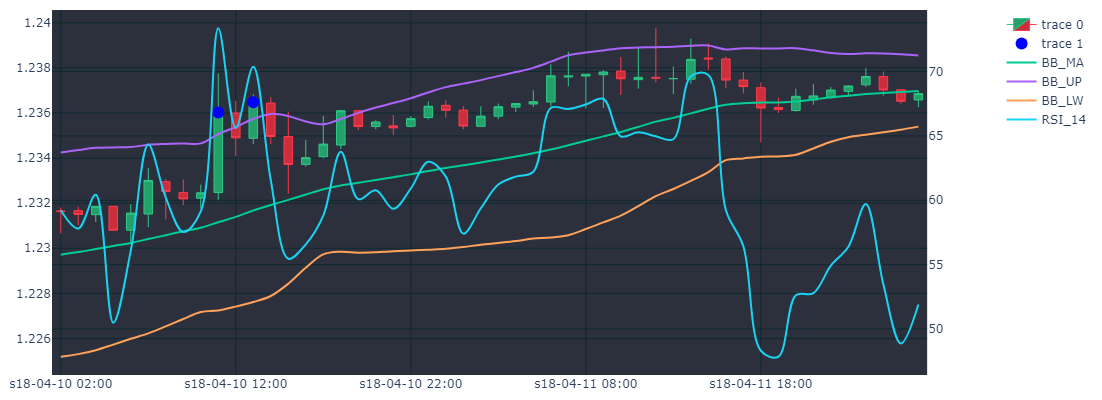

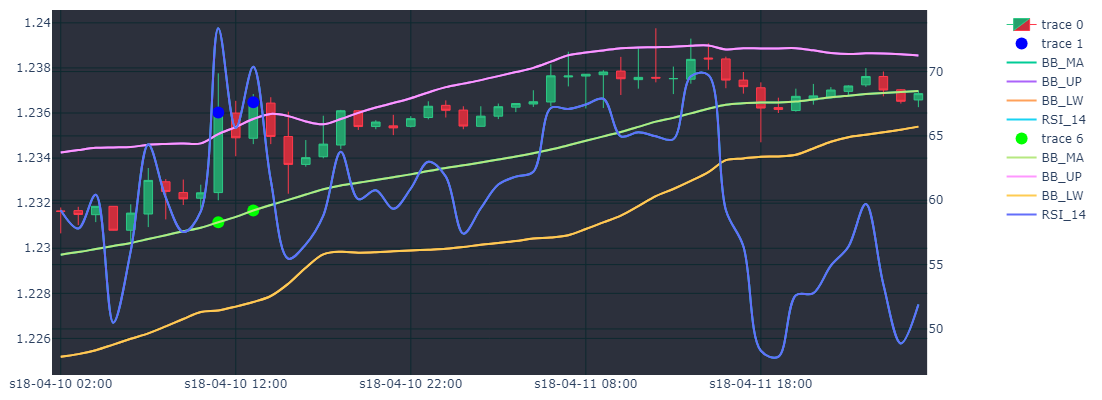

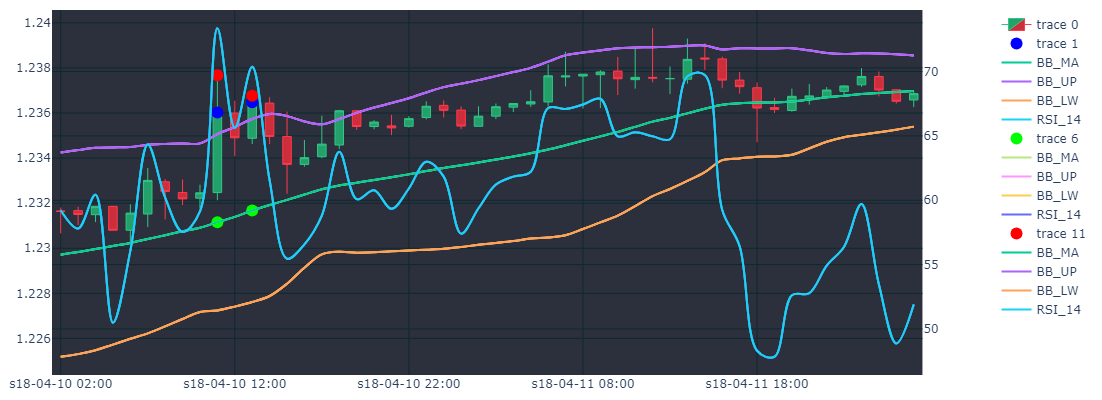

In [55]:
df_plot=df_slim.iloc[0:50]
cp=CandlePlot(df_plot, candles=True)

trades=cp.df_plot[df_plot.SIGNAL != NONE]
markers=['mid_c','TAKE_PROFIT',"STOP_LOSS"]
marker_colors=["#0000FF","#00FF00","#ff0000"]
for i in range(3):
    cp.fig.add_trace(go.Scatter(
        x=trades.sTime,
        y=trades[markers[i]],
        mode='markers',
        marker=dict(color=marker_colors[i],size=12)
        
    ))
    cp.show_plot(line_traces=["BB_MA","BB_UP","BB_LW"],sec_traces=["RSI_14"])

In [76]:
class Trade:
    def __init__(self,row):
        self.running=True
        self.start_index=row.name
        if row.SIGNAL== BUY:
            self.start_price=row.ask_c
            self.trigger_price=row.ask_c

        if row.SIGNAL== SELL:
            self.start_price=row.bid_c
            self.trigger_price=row.bid_c
            
        
        
        self.SIGNAL=row.SIGNAL
        self.TAKE_PROFIT=row.TAKE_PROFIT
        self.STOP_LOSS=row.STOP_LOSS
        self.result=0.0
        self.end_time=row.time
        self.start_time=row.time
        self.duration=0

    
    def close_trade(self,row,result,trigger_price):
        self.running=False
        self.result=result 
        self.end_time=row.time
        self.trigger_price=trigger_price
        
    
    
    def update(self,row):
        self.duration+=1
        if self.SIGNAL == BUY:
            if row.bid_h>=self.TAKE_PROFIT:
                self.close_trade(row,PROFIT_FACTOR,row.bid_h)
                
            elif row.bid_l<=self.STOP_LOSS:
                self.close_trade(row,LOSS_FACTOR,row.bid_l)

             # if row.bid_l<=self.STOP_LOSS:
             #    self.close_trade(row,LOSS_FACTOR,row.bid_l)
                
             # elif  row.bid_h>=self.TAKE_PROFIT:
             #    self.close_trade(row,PROFIT_FACTOR,row.bid_h)
                

        if self.SIGNAL == SELL:
            if row.ask_l<=self.TAKE_PROFIT:
                self.close_trade(row,PROFIT_FACTOR,row.ask_l)
                
            elif row.ask_h>=self.STOP_LOSS:
                self.close_trade(row,LOSS_FACTOR,row.ask_h)


            # if  row.mid_l>=self.STOP_LOSS:
            #     self.close_trade(row,LOSS_FACTOR,row.mid_h)
                
            # elif row.mid_h<=self.TAKE_PROFIT:
            #     self.close_trade(row,PROFIT_FACTOR,row.mid_l)
            



In [77]:
open_trades=[]
closed_trades=[]
for index, row in df_slim.iterrows():
    for ot in open_trades:
        ot.update(row)
        if ot.running==False:
            closed_trades.append(ot)
    open_trades=[x for x in open_trades if x.running==True]

    if row.SIGNAL!=NONE:
        open_trades.append(Trade(row))
    
        

In [78]:
df_results=pd.DataFrame.from_dict([vars(x) for x in closed_trades])
df_results.sort_values(by="start_index",inplace=True)

In [79]:
df_results.result.sum()

-4407.5

In [80]:
df_m5=pd.read_pickle("../data/EUR_USD_M5.pkl")

In [81]:
df_m5_slim=df_m5[['time','bid_h','bid_l','ask_h','ask_l']].copy()
df_m5_slim.head()

,time,bid_h,bid_l,ask_h,ask_l
0,2018-04-08 21:00:00+00:00,1.22840,1.22767,1.22900,1.22827
1,2018-04-08 21:05:00+00:00,1.22804,1.22728,1.22864,1.22788
2,2018-04-08 21:10:00+00:00,1.22778,1.22751,1.22838,1.22811
3,2018-04-08 21:15:00+00:00,1.22778,1.22759,1.22843,1.22811
4,2018-04-08 21:25:00+00:00,1.22796,1.22775,1.22832,1.22822


In [82]:
df_signals=df_slim[df_slim.SIGNAL != NONE].copy()


In [83]:
df_signals['m5_start']=[x+ dt.timedelta(hours=1) for x in df_signals.time]

In [84]:
df_signals['start_index_h1']=df_signals.index

In [85]:
df_signals.columns

Index(['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h', 'bid_l',
       'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c', 'direction', 'BB_MA',
       'BB_UP', 'BB_LW', 'SIGNAL', 'TAKE_PROFIT', 'STOP_LOSS', 'm5_start',
       'start_index_h1'],
      dtype='object')

In [86]:
df_signals.drop(['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h', 'bid_l',
        'ask_o', 'ask_h', 'ask_l', 'ENGULFING', 'EMA_200',
       'direction', 'RSI_14'
       ],axis=1, inplace=True)

KeyError: "['ENGULFING', 'EMA_200', 'RSI_14'] not found in axis"

In [ ]:
df_signals.rename(columns={
'bid_c':'start_price_BUY',
    'ask_c':'start_price_SELL',
'm5_start':'time'
    
},inplace=True)

In [ ]:
merged=pd.merge(left=df_m5_slim, right=df_signals,on='time',how='left')

In [ ]:
merged[merged.SIGNAL.isna()==False].head()
merged.fillna(0,inplace=True)
merged.SIGNAL=merged.SIGNAL.astype(int)
merged.start_index_h1=merged.start_index_h1.astype(int)

In [ ]:
merged.head()

In [ ]:
class TradeM5:
    def __init__(self,row):
        self.running=True
        self.start_index_m5=row.name
        if row.SIGNAL== BUY:
            self.start_price=row.start_price_BUY	
            self.trigger_price=row.start_price_BUY	

        if row.SIGNAL== SELL:
            self.start_price=row.start_price_SELL
            self.trigger_price=row.start_price_SELL
        
        self.start_index_h1=row.start_index_h1
        
        self.SIGNAL=row.SIGNAL
        self.TAKE_PROFIT=row.TAKE_PROFIT
        self.STOP_LOSS=row.STOP_LOSS
        self.result=0.0
        self.end_time=row.time
        self.start_time=row.time
        self.duration=1

    
    def close_trade(self,row,result,trigger_price):
        self.running=False
        self.result=result 
        self.end_time=row.time
        self.trigger_price=trigger_price
        
    
    
    def update(self,row):
        self.duration+=1
        if self.SIGNAL == BUY:
            if row.bid_h>=self.TAKE_PROFIT:
                self.close_trade(row,PROFIT_FACTOR,row.bid_h)
                
            elif row.bid_l<=self.STOP_LOSS:
                self.close_trade(row,LOSS_FACTOR,row.bid_l)

             # if row.mid_l<=self.STOP_LOSS:
             #    self.close_trade(row,LOSS_FACTOR,row.mid_l)
                
             # elif  row.mid_h>=self.TAKE_PROFIT:
             #    self.close_trade(row,PROFIT_FACTOR,row.mid_h)
                

        if self.SIGNAL == SELL:
            if row.ask_l<=self.TAKE_PROFIT:
                self.close_trade(row,PROFIT_FACTOR,row.ask_l)
                
            elif row.ask_h>=self.STOP_LOSS:
                self.close_trade(row,LOSS_FACTOR,row.ask_h)


            # if  row.mid_l>=self.STOP_LOSS:
            #     self.close_trade(row,LOSS_FACTOR,row.mid_h)
                
            # elif row.mid_h<=self.TAKE_PROFIT:
            #     self.close_trade(row,PROFIT_FACTOR,row.mid_l)
            



In [ ]:
open_trades_m5=[]
closed_trades_m5=[]
for index, row in merged.iterrows():
    if row.SIGNAL!=NONE:
        open_trades_m5.append(TradeM5(row))
        
    for ot in open_trades_m5:
        ot.update(row)
        if ot.running==False:
            closed_trades_m5.append(ot)
    open_trades_m5 = [x for x in open_trades_m5 if x.running==True]

    
    

In [ ]:
len(closed_trades_m5)

In [ ]:
df_res_m5=pd.DataFrame.from_dict([vars(x) for x in closed_trades_m5])


In [ ]:
df_res_m5.head()

In [ ]:
df_res_m5.result.sum()